In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# load data set, need mnist.npz in current work folder
with np.load("resources/mnist.npz", allow_pickle=True) as f:
    x_train, y_train = f["x_train"], f["y_train"]
    x_test, y_test = f["x_test"], f["y_test"]

print(x_train.shape, x_test.shape)

# 数据重塑为单列 
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print(x_train.shape, x_test.shape)

# 数据归一化
x_train = tf.cast(x_train, tf.float32) / 255
x_test = tf.cast(x_test, tf.float32) / 255

(60000, 28, 28) (10000, 28, 28)
(60000, 784) (10000, 784)


2023-11-10 20:11:59.414466: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2023-11-10 20:11:59.414487: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-11-10 20:11:59.414493: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-11-10 20:11:59.414666: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-10 20:11:59.414981: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


### Ex: 从正态分布中随机抽取样本

In [ ]:
mu, sigma = 0, 1
arr = np.random.normal(mu, sigma, size=1000)
print(abs(mu - np.mean(arr)))
print(abs(sigma - np.std(arr)))


import matplotlib.pyplot as plt

count, bins, ignored = plt.hist(arr, 30, normed=True, color="b")
plt.plot(
    bins,
    1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-((bins - mu) ** 2) / (2 * sigma**2)),
    linewidth=2,
    color="r",
)
plt.show()

0.027205474169761004
0.012759794235798871


TensorShape([60000, 784])

/var/folders/ly/1nz92nfj1jq23yd3gk5cxch00000gn/T/ipykernel_1197/2073522567.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  weights[i].fill(rd)


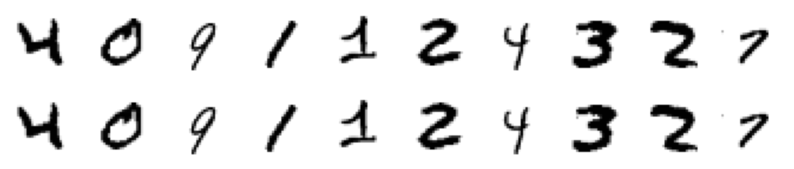

In [38]:
def data_set_reparam(min,max):
    
    global x_train_noised, x_test_noised
    global x_train_numpy, x_test_numpy

    def range_rand(size, min=0.0, max=1.0):
        return (max - min) * np.random.random(size=size) + min

    def gen_weight(shape, min, max):
        weights = np.empty(shape)
        for i in range(0, shape[0]):
            rd = range_rand(1, min, max)
            weights[i].fill(rd)
        return weights

    x_train_noised = x_train + gen_weight(x_train.shape, min, max) * np.random.normal(
        0, 1, size=x_train.shape
    )
    x_test_noised = x_test + gen_weight(x_test.shape, min, max) * np.random.normal(
        0, 1, size=x_test.shape
    )

    x_train_noised = np.clip(x_train_noised, 0.0, 1.0)
    x_test_noised = np.clip(x_test_noised, 0.0, 1.0)

    import matplotlib.pyplot as plt

    step = 20
    x_train_numpy = x_train.numpy()
    x_test_numpy = x_test.numpy()
    plt.figure(figsize=(10, 2))
    for i in range(0 + step, 10 + step):
        plt.subplot(2, 10, i - step + 1)
        plt.axis("off")
        plt.imshow(x_train_numpy[i].reshape(28, 28), cmap="binary")
        plt.subplot(2, 10, i - step + 11)
        plt.axis("off")
        plt.imshow(x_train_noised[i].reshape(28, 28), cmap="binary")

    x_train_noised = tf.cast(x_train_noised, tf.float32) / 255
    x_test_noised = tf.cast(x_test_noised, tf.float32) / 255

data_set_reparam(0.,0.)

In [6]:
input_size = 784
hidden_size = 32
output_size = 784

input_layer = tf.keras.layers.Input(shape=(input_size,))
encode_layer = tf.keras.layers.Dense(hidden_size, "softplus")(input_layer)
decode_layer = tf.keras.layers.Dense(output_size, "sigmoid")(encode_layer)
model_trained = tf.keras.Model(inputs=input_layer, outputs=decode_layer)

model_trained.compile(optimizer="adam", loss="mse")
model_trained.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50992 (199.19 KB)
Trainable params: 50992 (199.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


/var/folders/ly/1nz92nfj1jq23yd3gk5cxch00000gn/T/ipykernel_1197/2073522567.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  weights[i].fill(rd)


Epoch 1/100
118/118 [==============================] - 1s 5ms/step - loss: 0.0203 - val_loss: 0.0214
Epoch 2/100
118/118 [==============================] - 1s 5ms/step - loss: 0.0203 - val_loss: 0.0214
Epoch 3/100
118/118 [==============================] - 1s 6ms/step - loss: 0.0203 - val_loss: 0.0214
Epoch 4/100
118/118 [==============================] - 1s 5ms/step - loss: 0.0203 - val_loss: 0.0214
Epoch 5/100
118/118 [==============================] - 1s 6ms/step - loss: 0.0203 - val_loss: 0.0214
Epoch 6/100
118/118 [==============================] - 1s 6ms/step - loss: 0.0203 - val_loss: 0.0214
Epoch 7/100
118/118 [==============================] - 1s 6ms/step - loss: 0.0203 - val_loss: 0.0214
Epoch 8/100
118/118 [==============================] - 1s 6ms/step - loss: 0.0203 - val_loss: 0.0214
Epoch 9/100
118/118 [==============================] - 1s 5ms/step - loss: 0.0202 - val_loss: 0.0214
Epoch 10/100
118/118 [==============================] - 1s 5ms/step - loss: 0.0202 - val_lo

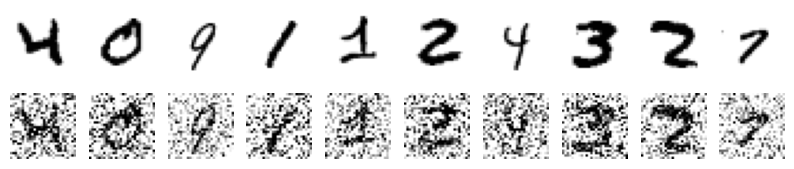

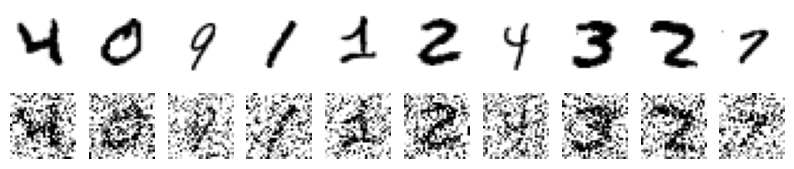

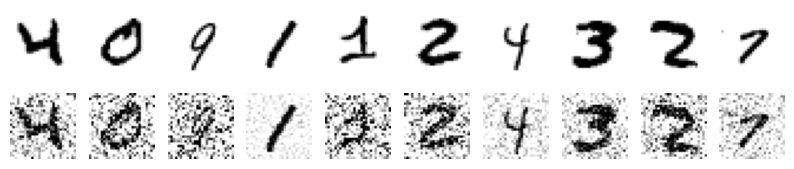

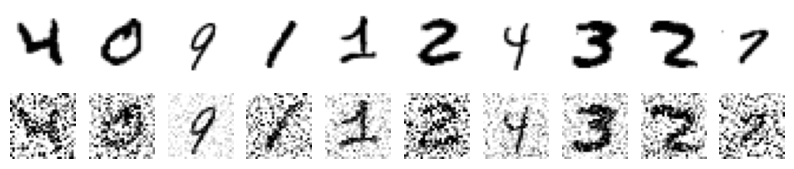

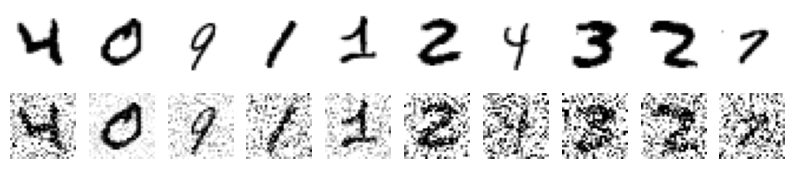

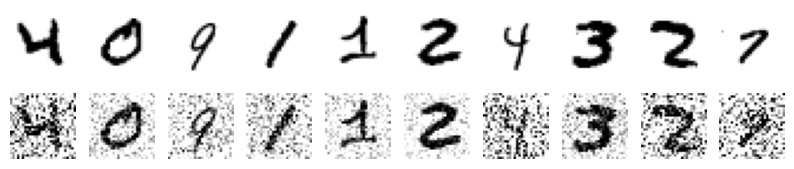

In [81]:
def train_model(epchoes, batch_size):
    model_trained.fit(
        x_train_noised,
        x_train,
        batch_size,
        epchoes,
        shuffle=True,
        validation_data=(x_test_noised, x_test),
    )

# 基础训练
data_set_reparam(0.0, 0.0)
train_model(100, 1024)

data_set_reparam(0.1, 0.2)
train_model(100, 1024)

data_set_reparam(0.1, 0.3)
train_model(100, 512)

# 中级训练
data_set_reparam(0.2, 0.4)
train_model(200, 1024)

data_set_reparam(0.2, 0.5)
train_model(300, 512)

# 综合训练I
data_set_reparam(0.1, 0.45)
train_model(500, 1024)

# 高级训练I
data_set_reparam(0.3, 0.55)
train_model(300, 512)

# 累了，歇一会儿
data_set_reparam(0.1, 0.4)
train_model(300, 1024)

# 高级训练II
data_set_reparam(0.3, 0.6)
train_model(300, 512)

# 综合训练II
data_set_reparam(0.1, 0.6)
train_model(800, 512)

# 极限训练
data_set_reparam(0.4, 0.65)
train_model(200, 512)

# 歇一下
data_set_reparam(0.0, 0.5)
train_model(100, 1024)

data_set_reparam(0.45, 0.65)
train_model(100, 512)

data_set_reparam(0.50, 0.7)
train_model(100, 512)

data_set_reparam(0.40, 0.65)
train_model(100, 512)

data_set_reparam(0.55, 0.7)
train_model(100, 512)

# 综合训练III
data_set_reparam(0.1, 0.7)
train_model(100, 512)

data_set_reparam(0.1, 0.7)
train_model(100, 512)

data_set_reparam(0.1, 0.7)
train_model(100, 512)

data_set_reparam(0.1, 0.7)
train_model(100, 512)

In [90]:
# Encoder
encoder = tf.keras.Model(inputs=input_layer, outputs=encode_layer)

# Decoder
decoder_inputs = tf.keras.layers.Input(shape=(hidden_size,))
decoder_outputs = model_trained.layers[-1](decoder_inputs)
decoder = tf.keras.Model(inputs=decoder_inputs, outputs=decoder_outputs)

# save model
encoder.save("minst_denoise_encoder.h5")
decoder.save("minst_denoise_decoder.h5")

/Users/catcolia/anaconda3/envs/NN/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


/var/folders/ly/1nz92nfj1jq23yd3gk5cxch00000gn/T/ipykernel_1197/2073522567.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  weights[i].fill(rd)


313/313 [==============================] - 0s 783us/step


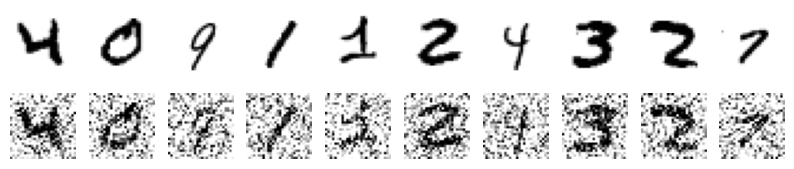

In [83]:
data_set_reparam(0.5,0.5)
test_set_encoded = encoder.predict(x_test_noised)
test_set_decoded = decoder.predict(test_set_encoded)

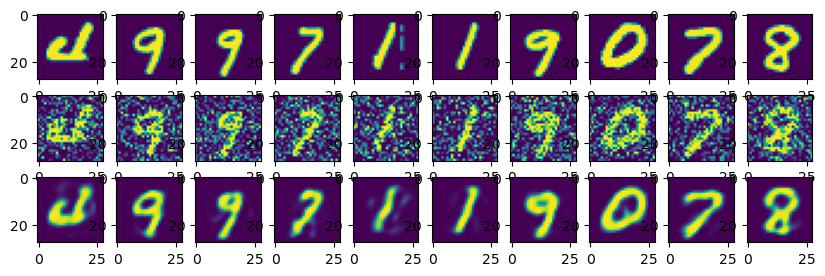

In [89]:
# show result of test set
plt.figure(figsize=(10,3))

step = 8000
x_test_noised_numpy = x_test_noised.numpy()

for i in range(0 + step, 10 + step):
    plt.subplot(3, 10, i-step+1)
    plt.axis("on")
    plt.imshow(x_test_numpy[i].reshape(28, 28))
    plt.subplot(3, 10, i-step+11)
    plt.axis("on")
    plt.imshow(x_test_noised_numpy[i].reshape(28, 28))
    plt.subplot(3, 10, i-step+21)
    plt.axis("on")
    plt.imshow(test_set_decoded[i].reshape(28, 28))